Exercise 1

1. Load the CIFAR-10 dataset

2. Implement a CNN model (e.g. 5 conv layers) with <=100 features on output

3. Train the discriminator using triplet loss

4. Save the weights of trained discriminator model

5. Build a model for classification of CIFAR-10, starting with the layers from discriminator and one or two fully-connected layers after that

6. Train this model in the following scenarios and compare results:

a. Randomly initialized model

b. Model with weights for convolutional layers loaded from trained discriminator, fully-connected layers initialized randomly

c. Model with weights for convolutional layers loaded from trained discriminator and freezed, fully-connected layers initialized randomly

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
train_dataset , test_dataset = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

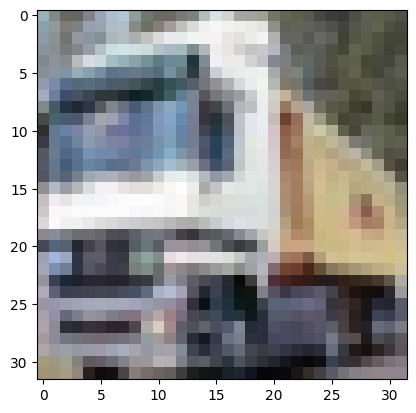

In [4]:
plt.imshow(x_train[1])

C:\Users\akopa\AppData\Local\Temp\ipykernel_14772\1710894633.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


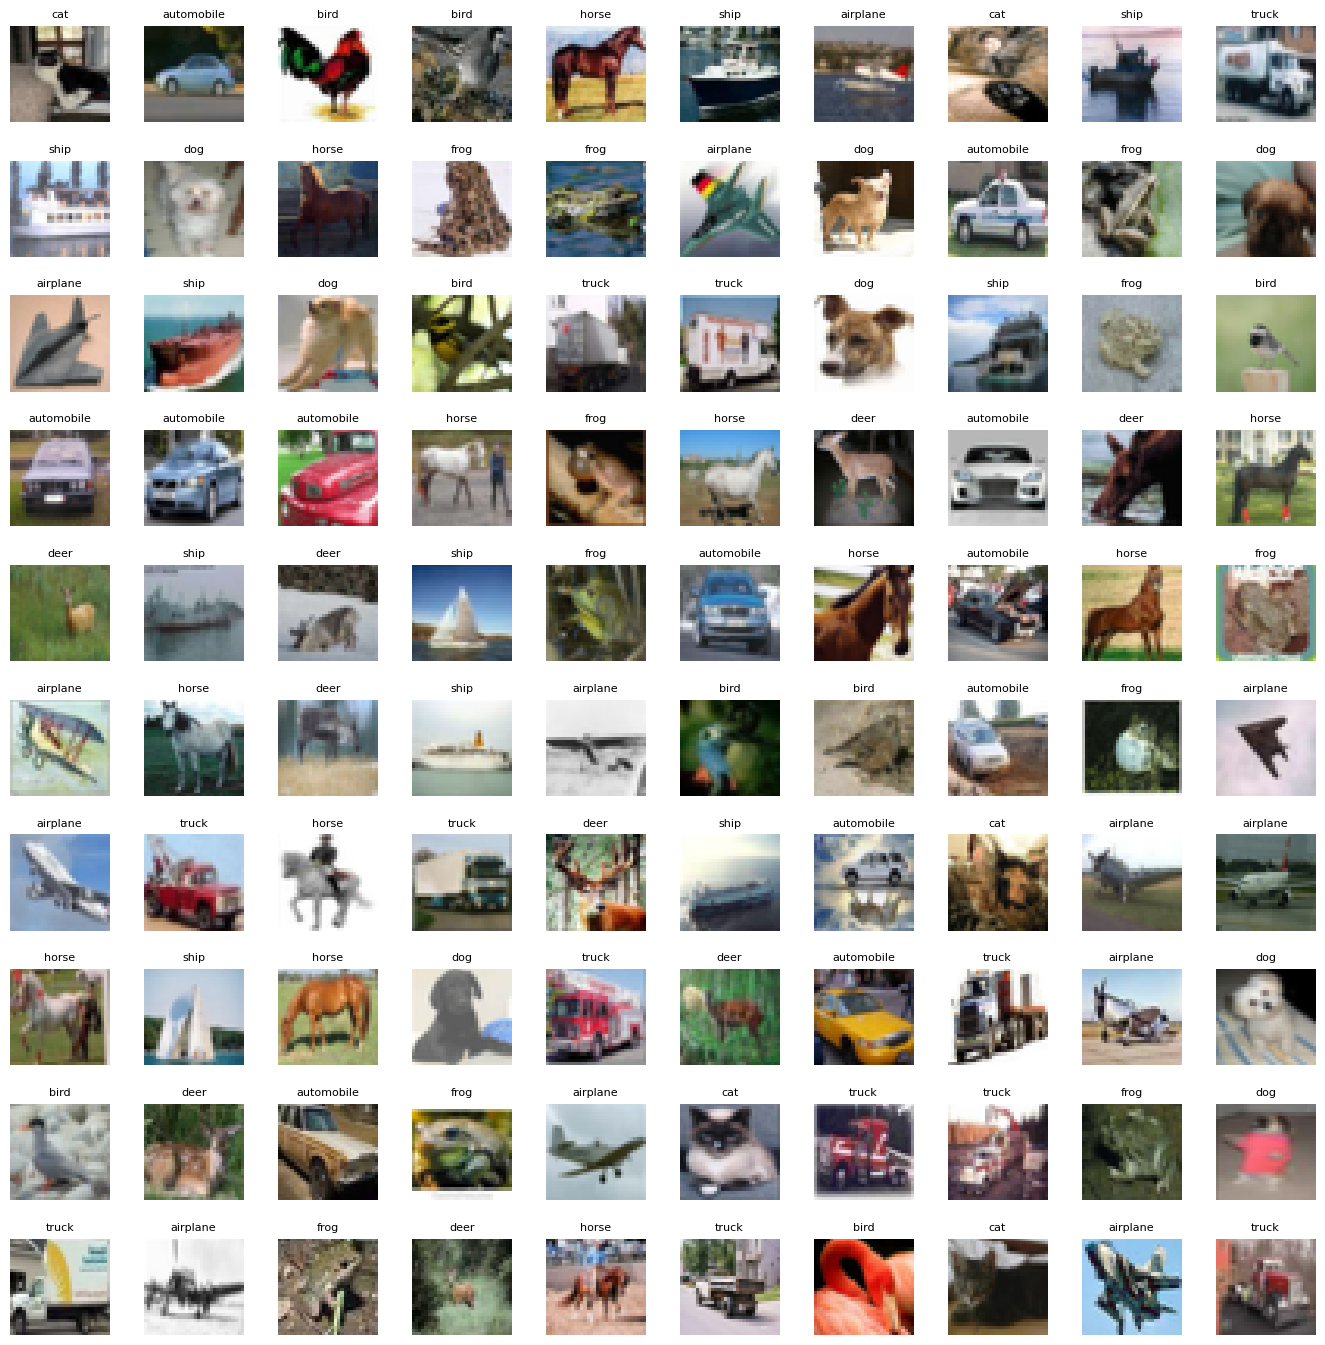

In [5]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [6]:
x_train.shape

(50000, 32, 32, 3)

some preprocessing

In [7]:
y_train, y_test = y_train.flatten(), y_test.flatten()
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
# define discriminator 

model = keras.Sequential()
model.add(keras.Input((32,32,3)))
model.add(keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(256,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128))  # Output embeddings
model.add(keras.layers.UnitNormalization())  # normalize according to l2 norm 

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ unit_normalization              │ (None, 128)            │             0 │
│ (UnitNormalization)             │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 349,600 (1.33 MB)

 Trainable params: 349,600 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# from triplet import TripletSemiHardLoss
from tensor_addons_triplet_loss import TripletSemiHardLoss

In [11]:
model.compile(optimizer='adam',
              loss=TripletSemiHardLoss())

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.9368 - val_loss: 0.9090
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.9083 - val_loss: 0.8957
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.8867 - val_loss: 0.8881
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.8692 - val_loss: 0.8631
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.8323 - val_loss: 0.8004
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.7927 - val_loss: 0.7796
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.7583 - val_loss: 0.7562
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.7306 - val_loss: 0.7519
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.7079 - val_loss: 0.7382
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.6966 - val_loss: 0.7203


In [12]:
model.save_weights("discriminator.weights.h5")

In [13]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <UnitNormalization name=unit_normalization, built=True>]

In [14]:
# Load weights into an existing model
model.load_weights('discriminator.weights.h5')

In [15]:
def create_model():
    # same is discriminator
    model_random = keras.Sequential()
    model_random.add(keras.Input((32,32,3)))
    model_random.add(keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
    model_random.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    model_random.add(keras.layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
    model_random.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    model_random.add(keras.layers.Conv2D(256,(3,3),padding = 'same',activation = 'relu'))
    model_random.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    model_random.add(keras.layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
    model_random.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    model_random.add(keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
    model_random.add(keras.layers.Flatten())
    # model.add(keras.layers.Dense(128))  # Output embeddings
    # model.add(keras.layers.UnitNormalization())  # normalize according to l2 norm 
    # fully connected layers
    
    model_random.add(keras.layers.Dense(128,activation='relu'))
    model_random.add(keras.layers.Dense(10,activation='softmax'))
    
        
    return model_random


In [16]:
model_random = create_model()


In [17]:
model_random.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 256)      │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 350,890 (1.34 MB)

 Trainable params: 350,890 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
def accuracy_fn(y_pred , y):
    y_pred = np.array(y_pred)
    y = np.array(y)
    counter = 0
    for i in range(len(y)):
        if y[i] != y_pred[i]:
            counter +=1
    return 1 - counter / len(y)

In [19]:
train_labels_oh , test_labels_oh = keras.utils.to_categorical(y_train, num_classes=10),keras.utils.to_categorical(y_test,num_classes = 10) # 1 hot encoding 

In [20]:
model_random.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics = ['accuracy'])

history1 = model_random.fit(x_train, train_labels_oh, epochs=10, 
                    validation_data=(x_test, test_labels_oh))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3360 - loss: 1.7652 - val_accuracy: 0.5733 - val_loss: 1.2092
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6057 - loss: 1.1085 - val_accuracy: 0.6409 - val_loss: 1.0186
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6890 - loss: 0.8719 - val_accuracy: 0.7015 - val_loss: 0.8664
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7423 - loss: 0.7373 - val_accuracy: 0.7177 - val_loss: 0.8195
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7817 - loss: 0.6259 - val_accuracy: 0.7101 - val_loss: 0.8367
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8100 - loss: 0.5517 - val_accuracy: 0.7292 - val_loss: 0.8122
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8380 - loss: 0.4670 - val_accuracy: 0.7266 - val_loss: 0.8788
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8504 - loss: 0.4208 - 

In [21]:
y_pred = np.argmax(model_random(x_test),axis = 1)
accuracy_fn(y_pred,y_test)

0.7273000000000001

In [22]:
model_from_dis = create_model()

In [23]:
model_from_dis.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 256)      │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 4, 4, 64)       │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 350,890 (1.34 MB)

 Trainable params: 350,890 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_from_dis.load_weights("discriminator.weights.h5",skip_mismatch = True)

c:\Users\akopa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:629: UserWarning: A total of 1 objects could not be loaded. Example error message for object <Dense name=dense_4, built=True>:

Layer 'dense_4' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=dense_4, built=True>]
  warnings.warn(msg)


In [25]:
model_from_dis.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics = ['accuracy'])

history2 = model_from_dis.fit(x_train, train_labels_oh, epochs=10, 
                    validation_data=(x_test, test_labels_oh))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5969 - loss: 1.2384 - val_accuracy: 0.6836 - val_loss: 0.9233
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7446 - loss: 0.7401 - val_accuracy: 0.6930 - val_loss: 0.9219
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7799 - loss: 0.6339 - val_accuracy: 0.7187 - val_loss: 0.8534
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8066 - loss: 0.5562 - val_accuracy: 0.7183 - val_loss: 0.8474
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8389 - loss: 0.4730 - val_accuracy: 0.7244 - val_loss: 0.8777
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8590 - loss: 0.4122 - val_accuracy: 0.7130 - val_loss: 0.9307
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8779 - loss: 0.3502 - val_accuracy: 0.7172 - val_loss: 0.9583
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8966 - loss: 0.2987 - 

In [26]:
model_from_dis_frozen = create_model()

In [27]:
model_from_dis_frozen.load_weights("discriminator.weights.h5",skip_mismatch = True)

c:\Users\akopa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:629: UserWarning: A total of 1 objects could not be loaded. Example error message for object <Dense name=dense_6, built=True>:

Layer 'dense_6' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=dense_6, built=True>]
  warnings.warn(msg)


In [28]:
for layer in model_from_dis_frozen.layers[:-2]:   # layers that was included in discrimator 
    layer.trainable = False

In [29]:
model_from_dis_frozen.layers[0].trainable

False

In [30]:
model_from_dis_frozen.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics = ['accuracy'])

history3 = model_from_dis_frozen.fit(x_train, train_labels_oh, epochs=10, 
                    validation_data=(x_test, test_labels_oh))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6501 - loss: 1.2093 - val_accuracy: 0.6401 - val_loss: 1.0687
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6898 - loss: 0.9281 - val_accuracy: 0.6401 - val_loss: 1.0537
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6927 - loss: 0.9135 - val_accuracy: 0.6481 - val_loss: 1.0185
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6974 - loss: 0.8960 - val_accuracy: 0.6484 - val_loss: 1.0279
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6956 - loss: 0.8952 - val_accuracy: 0.6482 - val_loss: 1.0267
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6989 - loss: 0.8847 - val_accuracy: 0.6471 - val_loss: 1.0256
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6989 - loss: 0.8751 - val_accuracy: 0.6435 - val_loss: 1.0241
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6971 - loss: 0.8788 - 